<a href="https://colab.research.google.com/github/julmoram/TelecomX_LATAM2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importaci√≥n de Datos

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/julmoram/TelcomX_LATAM/main/datos_tratados.csv'
datos = pd.read_csv(url)
print(datos.head())

   Churn  SeniorCitizen  tenure  PhoneService  MultipleLines InternetService  \
0      0              0       9             1              0             dsl   
1      0              0       9             1              1             dsl   
2      1              0       4             1              0     fiber optic   
3      1              1      13             1              0     fiber optic   
4      1              1       3             1              0     fiber optic   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            1            1   
1               0             0                 0            0            0   
2               0             0                 1            0            0   
3               0             1                 1            0            1   
4               0             0                 0            1            1   

   StreamingMovies        Contract  Paperles

In [2]:
datos['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

#  Exploraci√≥n de Datos

Tasa de cancelaci√≥n en clientes Senior: 41.68%
Tasa de cancelaci√≥n en clientes no Senior: 23.65%


/tmp/ipython-input-30-357063612.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-30-357063612.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




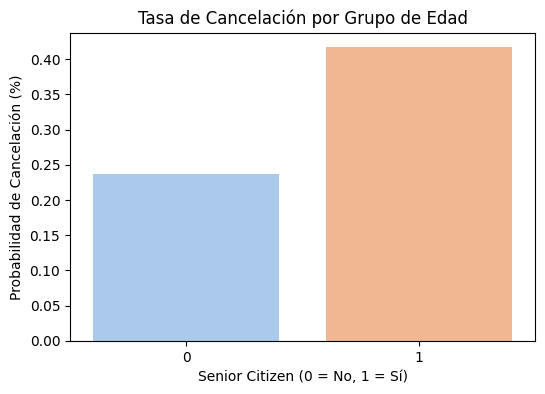

In [30]:
# Relaci√≥n entre SeniorCitizen y Churn
senior_churn = datos.groupby('SeniorCitizen')['Churn'].mean() * 100
print(f"Tasa de cancelaci√≥n en clientes Senior: {senior_churn[1]:.2f}%")
print(f"Tasa de cancelaci√≥n en clientes no Senior: {senior_churn[0]:.2f}%")

# Gr√°fico de comparaci√≥n
plt.figure(figsize=(6, 4))
sns.barplot(x='SeniorCitizen', y='Churn', data=datos, ci=None, palette='pastel')
plt.title("Tasa de Cancelaci√≥n por Grupo de Edad")
plt.xlabel("Senior Citizen (0 = No, 1 = S√≠)")
plt.ylabel("Probabilidad de Cancelaci√≥n (%)")
plt.show()

Este an√°lisis revela si los clientes mayores son m√°s propensos a cancelar, lo que podr√≠a requerir estrategias de retenci√≥n espec√≠ficas.



Porcentaje de clientes que cancelan: 26.58%
Porcentaje de clientes activos: 73.42%


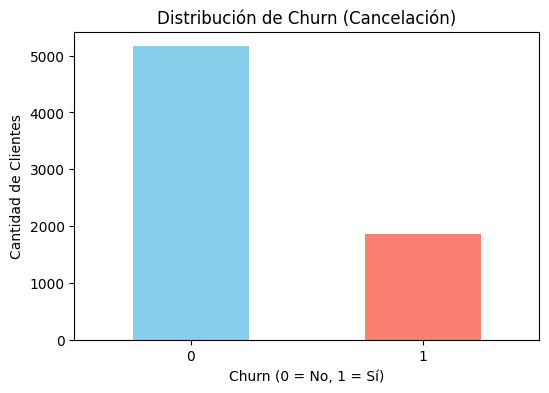

In [29]:
# Proporci√≥n de cancelaciones (Churn)
churn_rate = datos['Churn'].value_counts(normalize=True) * 100
print(f"Porcentaje de clientes que cancelan: {churn_rate[1]:.2f}%")
print(f"Porcentaje de clientes activos: {churn_rate[0]:.2f}%")

# Gr√°fico de distribuci√≥n de Churn
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
datos['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribuci√≥n de Churn (Cancelaci√≥n)")
plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=0)
plt.show()

Un gr√°fico de barras ayuda a visualizar r√°pidamente el desbalance entre clientes que se van y los que se quedan.



Tasa de cancelaci√≥n por tipo de contrato:
Contract
month-to-month    42.709677
one year          11.277174
two year           2.848665
Name: Churn, dtype: float64


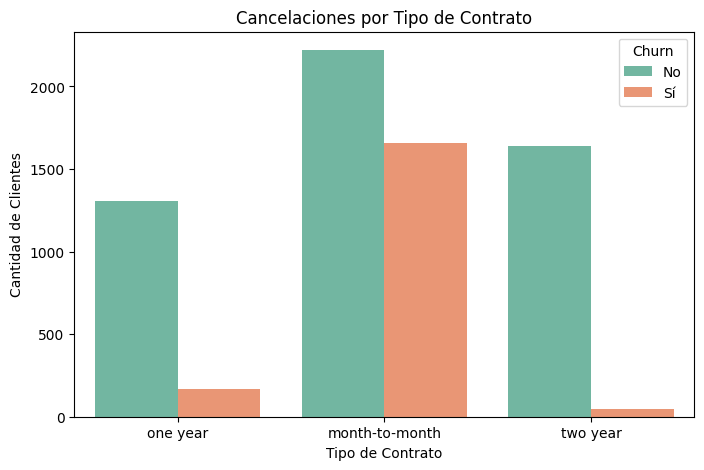

In [31]:
# Cancelaci√≥n por tipo de contrato
contract_churn = datos.groupby('Contract')['Churn'].mean() * 100
print("Tasa de cancelaci√≥n por tipo de contrato:")
print(contract_churn)

# Gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=datos, palette='Set2')
plt.title("Cancelaciones por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.legend(title='Churn', labels=['No', 'S√≠'])
plt.show()

Este gr√°fico ayuda a identificar si los contratos mensuales tienen mayor rotaci√≥n que los anuales/bianuales.

## Paso 1: Conociendo el dataset

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   int64  
 14  PaymentMethod     7032 non-null   object 
 15  Monthly           7032 non-null   float64
 16  Total             7032 non-null   float64


## 3. An√°lisis de Variables Categ√≥ricas y Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables categ√≥ricas
binarias = ['Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling']
multiclase = ['InternetService', 'Contract', 'PaymentMethod']
todas = binarias + multiclase
# Cantidad total de gr√°ficos y cantidad de filas necesarias
n = len(todas)
filas = (n + 1) // 2
# Gr√°ficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=todas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(todas):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = px.histogram(datos, x=var, color='Churn', barmode='group')
    for trace in hist.data:
        trace.showlegend = False
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(showticklabels=True, showgrid=False, tickvals=None, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribuci√≥n de variables categ√≥ricas (seg√∫n Churn)",
    showlegend=False
)
graf.show()

## 4. An√°lisis de Variables Num√©ricas

### Variables num√©ricas

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables num√©ricas
numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
# Cantidad total de gr√°ficos y cantidad de filas necesarias
n = len(numericas)
filas = (n + 1) // 2
# Gr√°ficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=numericas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(numericas):
    row = i // 2 + 1
    col = i % 2 + 1
    box = px.box(datos, x='Churn', y=var, color='Churn', points=False)
    for trace in box.data:
        trace.showlegend = (i == 0)  # solo la primera tiene leyenda
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(tickangle=0, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribuci√≥n de variables num√©ricas seg√∫n Churn",
    showlegend=True
)
graf.show()

# **PREPARACI√ìN DE DATOS**

## 1. Separaci√≥n Variables Explicativas (X) y Variable Respuesta (y)

In [6]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']

## 2. Transformaci√≥n de Variables Explicativas

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
columnas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['InternetService', 'Contract', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__Contract_month-to-month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaymentMethod_bank transfer (automatic)',
       'onehotencoder__PaymentMethod_credit card (automatic)',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check',
       'remainder__SeniorCitizen', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Monthly',
       'remainder__Total', 'remainder__Cuentas_Diarias'], dtype=object)

In [8]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

onehotencoder__InternetService_dsl  \
0                                    1.0   
1                                    1.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
7027                                 1.0   
7028                                 0.0   
7029                                 1.0   
7030                                 1.0   
7031                                 1.0   

      onehotencoder__InternetService_fiber optic  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   
...                                          ...   
7027                                         0.0   
7028                                         1.0   
7029                                         0.0   
7030                                         0.0   
7031                                         0.0   

      onehotencoder__InternetService_no  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
7027                                0.0   
7028                                0.0   
7029                                0.0   
7030                                0.0   
7031                                0.0   

      onehotencoder__Contract_month-to-month  \
0                                        0.0   
1                                        1.0   
2                                        1.0   
3                                        1.0   
4                                        1.0   
...                                      ...   
7027                                     0.0   
7028                                     1.0   
7029                                     1.0   
7030                                     0.0   
7031                                     0.0   

      onehotencoder__Contract_one year  onehotencoder__Contract_two year  \
0                                  1.0                               0.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
7027                               1.0                               0.0   
7028                               0.0                               0.0   
7029                               0.0                               0.0   
7030                               0.0                               1.0   
7031                               0.0                               1.0   

      onehotencoder__PaymentMethod_bank transfer (automatic)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
7027                                                0.0        
7028                                                0.0        
7029                                                0.0        
7030                                                0.0        
7031                                                0.0        

      onehotencoder__PaymentMethod_credit card (automatic)  \
0             

## 3. Separaci√≥n de datos para Entrenamiento, Validaci√≥n y Prueba

In [9]:
from sklearn.model_selection import train_test_split
# PRUEBA (temp)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=5
)
# ENTRENAMIENTO (train) Y VALIDACION (val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=5
)

## 4. Balanceo de Clases

In [10]:
from imblearn.over_sampling import SMOTE
# Solo en grupo de train
smote = SMOTE(random_state=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_bal).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


# **MODELO DE BASE / DUMMY**

## Generaci√≥n del Modelo de Referencia (Baseline)

In [11]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7345971563981043

In [12]:
churn_porcentaje = datos['Churn'].value_counts(normalize=True) * 100
# Mostrar resultados
print("\nPorcentaje de Churn:")
print(churn_porcentaje)



Porcentaje de Churn:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


*Modelo Dummy: El porcentaje de exactitud es similar al porcentaje de Churn negativo (de clientes que siguien siendo clientes), por lo cual podemos suponer que el modelo no refleja verdadera capacidad para predecir datos, sino simplemente la dominancia de la clase 0 - "no churn".*

# **CORRELACI√ìN Y SELECCI√ìN DE VARIABLES**

## 1. An√°lisis de Correlaci√≥n

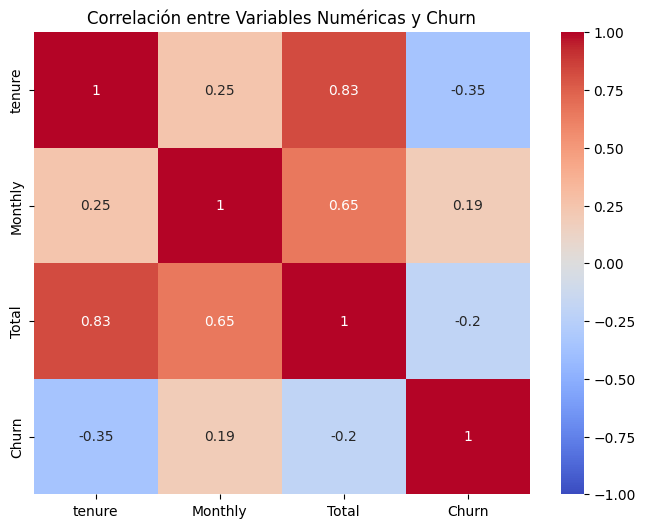

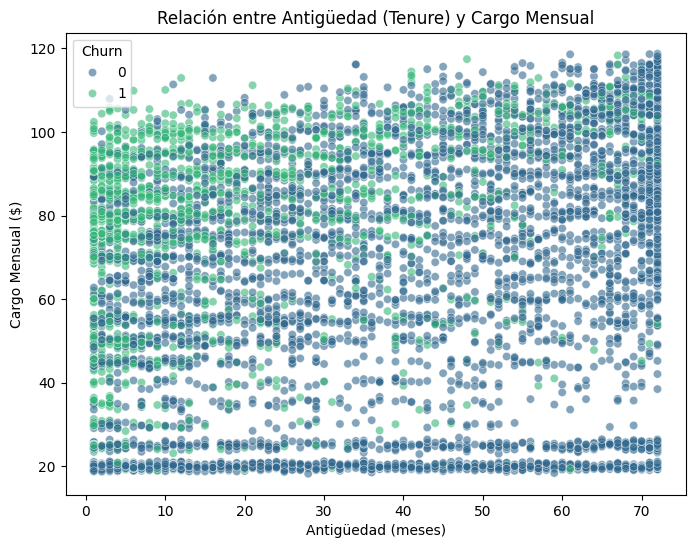

In [32]:
# Matriz de correlaci√≥n
corr = datos[['tenure', 'Monthly', 'Total', 'Churn']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlaci√≥n entre Variables Num√©ricas y Churn")
plt.show()

# Gr√°fico de dispersi√≥n: MonthlyCharges vs. Tenure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='Monthly', hue='Churn', data=datos, alpha=0.6, palette='viridis')
plt.title("Relaci√≥n entre Antig√ºedad (Tenure) y Cargo Mensual")
plt.xlabel("Antig√ºedad (meses)")
plt.ylabel("Cargo Mensual ($)")
plt.show()


Los datos sugieren que clientes con gastos m√°s altos (Monthly, Total) y mayor antig√ºedad (Tenure) tienden a abandonar menos

## 2. An√°lisis Dirigido

In [14]:
import plotly.express as px

px.box(datos, x='Churn', y='tenure', color='Churn', points='outliers', width=800, height=600, title='Distribuci√≥n de tenure seg√∫n cancelaci√≥n').show()
px.box(datos, x='Churn', y='Total', color='Churn', points='outliers', width=800, height=600, title='Distribuci√≥n de Total seg√∫n cancelaci√≥n').show()

El an√°lisis revela una relaci√≥n inversa entre Tenure (antig√ºedad del cliente) y Churn (abandono), donde a mayor antig√ºedad, menor probabilidad de abandono. Adem√°s, se observa cierta variabilidad en la correlaci√≥n entre Total (gastos acumulados) y Churn, con valores dispersos que sugieren patrones menos consistentes

# **MODELADO PREDICTIVO**

## 1. Generaci√≥n del Modelo de √Årbol de Decisi√≥n

In [15]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
arbol.fit(X_train, y_train)
arbol_val  = arbol.score(X_val,  y_val)
arbol_test = arbol.score(X_test, y_test)
print(f'√Årbol: {arbol_test:.4f}')


√Årbol: 0.7972


*Modelo de √Årbol de Decisi√≥n: Super√≥ al modelo baseline por m√°s de 5 puntos, por lo que podemos inferir que hubo un aprendizaje para clasificar clientes que hacen churn.*

### Gr√°fico del √Årbol de Decisi√≥n

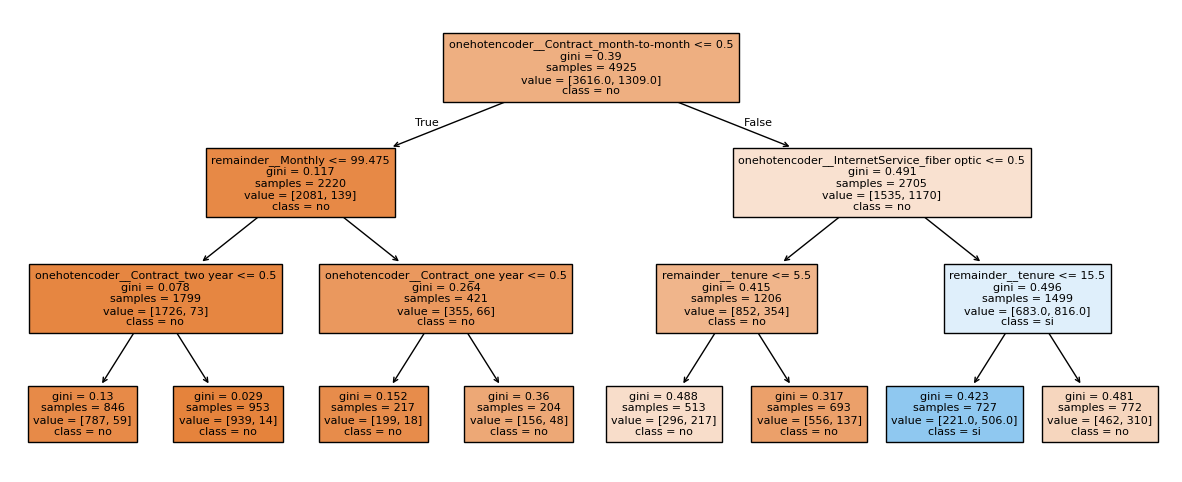

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
valores_columnas = [
    'onehotencoder__InternetService_dsl',
    'onehotencoder__InternetService_fiber optic',
    'onehotencoder__InternetService_no',
    'onehotencoder__Contract_month-to-month',
    'onehotencoder__Contract_one year',
    'onehotencoder__Contract_two year',
    'onehotencoder__PaymentMethod_bank transfer (automatic)',
    'onehotencoder__PaymentMethod_credit card (automatic)',
    'onehotencoder__PaymentMethod_electronic check',
    'onehotencoder__PaymentMethod_mailed check',
    'remainder__SeniorCitizen', 'remainder__tenure',
    'remainder__PhoneService', 'remainder__MultipleLines',
    'remainder__OnlineSecurity', 'remainder__OnlineBackup',
    'remainder__DeviceProtection', 'remainder__TechSupport',
    'remainder__StreamingTV', 'remainder__StreamingMovies',
    'remainder__PaperlessBilling', 'remainder__Monthly',
    'remainder__Total', 'remainder__Cuentas_Diarias'
]
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'si'], fontsize = 8, feature_names = valores_columnas);

*Si bien el an√°lisis de la matriz de correlaci√≥n arrojaba una correlaci√≥n significativa entre el 'tenure' y el 'Churn', mediante la graficaci√≥n del modelo de √°rbol de decisi√≥n, podemos observar que seg√∫n este √∫ltimo modelo el nodo ra√≠z corresponder√≠a al **tipo de contrato - mes a mes**. Dicha variable se podr√≠a explicar ya que los contratos mes a mes son m√°s vol√°tiles y podr√≠an impactar en la no fidelizaci√≥n del cliente.*

## 2. Normalizaci√≥n de datos

*El modelo KNN, al basarse en calcular distancias entre observaciones, es sensible a las magnitudes num√©ricas. De esta forma, si no normaliz√°ramos los datos - en este caso con MinMaxScaler -, las variables que tienen rangos m√°s amplios tendr√≠an m√°s significatividad para el modelo que otras con menor rango.*

In [17]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

## 3. Generaci√≥n del Modelo KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
knn_val  = knn.score(X_val_norm,  y_val)
knn_test = knn.score(X_test_norm, y_test)
print(f'KNN: {knn_test:.4f}')


KNN: 0.7725


*Modelo KNN: Super√≥ al modelo baseline aunque obtuvo menor puntaje de exactitud que el modelo de √°rbol de desiciones, por tanto podemos inferir que hubo un aprendizaje para clasificar clientes que hacen churn, pero no tan eficiente como el observado en el modelo de √°rbol de decisiones.*

## 4. Evaluaci√≥n de Modelos

### 1) C√°lculo de exactitud de cada modelo:

In [19]:
print(f'Exactitud Dummy: Test: {(dummy.score(X_test, y_test)):.4f}')
print(f'Exactitud √Årbol: Validaci√≥n: {arbol_val:.4f} | Test: {arbol_test:.4f}')
print(f'Exactitud KNN: Validaci√≥n: {knn_val:.4f} | Test: {knn_test:.4f}')

Exactitud Dummy: Test: 0.7346
Exactitud √Årbol: Validaci√≥n: 0.7785 | Test: 0.7972
Exactitud KNN: Validaci√≥n: 0.7643 | Test: 0.7725


### 2) Matrices de confusi√≥n de cada modelo:

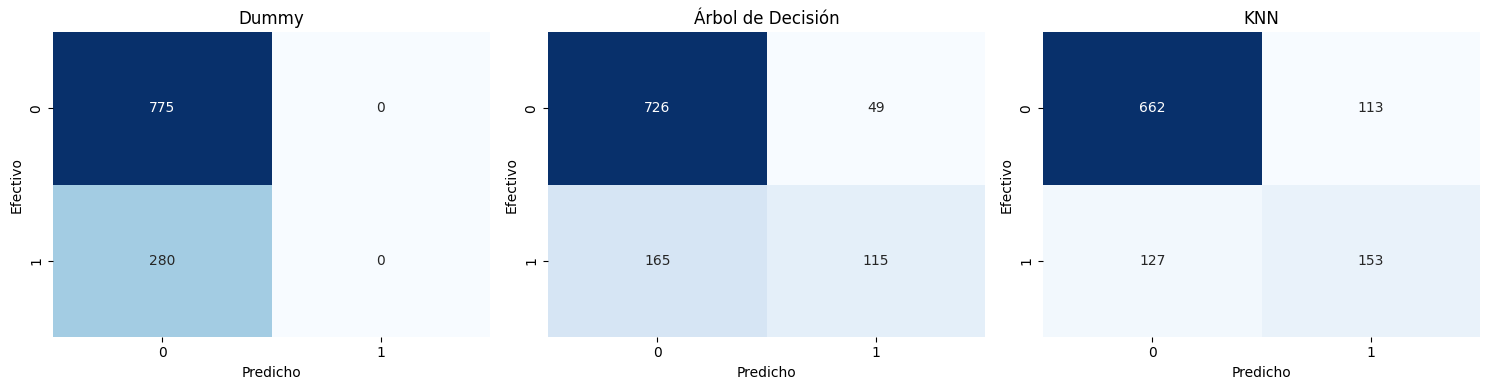

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
modelos = {
    "Dummy": dummy,
    "√Årbol de Decisi√≥n": arbol,
    "KNN": knn
}
X_tests = {
    "Dummy": X_test,
    "√Årbol de Decisi√≥n": X_test,
    "KNN": X_test_norm
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_tests[nombre])
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(nombre)
    axes[i].set_xlabel('Predicho')
    axes[i].set_ylabel('Efectivo')
plt.tight_layout()
plt.show()

Dummy:

Predicci√≥n √∫nica (siempre "0")

0% de detecci√≥n de churn real

√Årbol:

Detect√≥ 41.07% de churns reales

Buen equilibrio en predicciones

KNN:

Mayor detecci√≥n (54.64% de churns reales)

Pero m√°s errores en casos sin churn

Interpretaci√≥n:

El √°rbol ofrece mayor equilibrio general

KNN prioriza detectar m√°s churns (a costa de m√°s falsas alarmas)

Dummy no sirve como modelo predictivo

(Modelo ideal buscar√≠a balance entre detectar churns reales y minimizar falsas alarmas)

### 3) Presici√≥n de cada modelo:

In [21]:
from sklearn.metrics import precision_score
print("Precisi√≥n Dummy:", precision_score(y_test, dummy.predict(X_test), zero_division=0))
print("Precisi√≥n √Årbol:", precision_score(y_test, arbol.predict(X_test), zero_division=0))
print("Precisi√≥n KNN:", precision_score(y_test, knn.predict(X_test_norm), zero_division=0))

Precisi√≥n Dummy: 0.0
Precisi√≥n √Årbol: 0.7012195121951219
Precisi√≥n KNN: 0.575187969924812


Dummy: 0% (in√∫til)

√Årbol: 70.12% (mejor precisi√≥n, menos falsos positivos)

KNN: 57.51% (m√°s falsas alarmas)

Conclusi√≥n: El √°rbol es m√°s preciso, pero KNN compensa con mejor recall.

(Precisi√≥n alta = menos casos incorrectamente marcados como churn)

### 4) Recall de cada modelo:

In [22]:
from sklearn.metrics import recall_score
print("Recall Dummy:", recall_score(y_test, dummy.predict(X_test)))
print("Recall √Årbol:", recall_score(y_test, arbol.predict(X_test)))
print("Recall KNN:", recall_score(y_test, knn.predict(X_test_norm)))

Recall Dummy: 0.0
Recall √Årbol: 0.4107142857142857
Recall KNN: 0.5464285714285714


*Con el c√°lculo de **RECALL** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Confirma la nulidad de su precisi√≥n, no logrando identificar ning√∫n caso real de cancelaci√≥n.*
* **El modelo √Årbol**: *Obtuvo un recall del 41,07%, indicando que a√∫n requiere mejoras para poder detectar los casos que efectivamente se dieron de baja.*
* **El modelo KNN**: *Obtuvo un recall del 54,64%, lo que indicaria un mayor rendimiento con respecto al modelo de √°rbol, pero a costas de su menor precisi√≥n.*

### 5) F1-Score de cada modelo:

In [23]:
from sklearn.metrics import f1_score
print("F1-score Dummy:", f1_score(y_test, dummy.predict(X_test), zero_division=0))
print("F1-score √Årbol:", f1_score(y_test, arbol.predict(X_test), zero_division=0))
print("F1-score KNN:", f1_score(y_test, knn.predict(X_test_norm), zero_division=0))

F1-score Dummy: 0.0
F1-score √Årbol: 0.5180180180180181
F1-score KNN: 0.5604395604395604


Comparativa F1-Score:

Dummy: 0 (sin capacidad predictiva)

√Årbol: 0.518 (rendimiento moderado)

KNN: 0.560 (mejor balance precisi√≥n-recall)

Conclusi√≥n: KNN es el mejor modelo, pero todos requieren mejora.

(F1 ideal >0.7 para considerar buen rendimiento)

### 6) Exportaci√≥n de archivos binarios:

In [24]:
import pickle
with open('datos_transformados.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(knn, archivo)

# **INTERPRETACI√ìN Y CONCLUSIONES**

## 1. An√°lisis de la Importancia de las Variables

### 1) **Regresi√≥n Log√≠stica**

In [25]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_norm, y_train)
coeficientes = pd.Series(log_reg.coef_[0], index=one_hot.get_feature_names_out())
coeficientes.sort_values(key=np.abs, ascending=False).head(10)

remainder__tenure                            -2.830525
remainder__Total                              1.018930
onehotencoder__InternetService_no            -0.874306
onehotencoder__Contract_two year             -0.780769
onehotencoder__Contract_month-to-month        0.684487
onehotencoder__InternetService_fiber optic    0.676260
remainder__PhoneService                      -0.638885
remainder__TechSupport                       -0.444992
remainder__OnlineSecurity                    -0.419406
remainder__SeniorCitizen                      0.335672
dtype: float64

Tenure (Antig√ºedad):

A m√°s tiempo como cliente ‚Üí menos probabilidad de abandono

Variable m√°s consistente y predictiva

Total facturado:

A mayor monto pagado ‚Üí m√°s probabilidad de cancelaci√≥n

Relaci√≥n confirmada tras controlar otras variables

Implicancias:

Los clientes nuevos y los que pagan montos altos son los de mayor riesgo

Se recomienda:

Programas de fidelizaci√≥n para clientes recientes

Revisar estructura de precios para clientes con facturas elevadas

### 2) **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
importancia_rf = pd.Series(rf.feature_importances_, index=one_hot.get_feature_names_out())
importancia_rf.sort_values(ascending=False).head(10)

remainder__Total                                 0.179930
remainder__Monthly                               0.155675
remainder__tenure                                0.153984
remainder__Cuentas_Diarias                       0.124954
onehotencoder__Contract_month-to-month           0.069671
onehotencoder__PaymentMethod_electronic check    0.030705
onehotencoder__Contract_two year                 0.024933
onehotencoder__InternetService_fiber optic       0.024149
remainder__PaperlessBilling                      0.022952
remainder__SeniorCitizen                         0.021081
dtype: float64

*Con el **RANDOM FOREST** podemos determinar que las variables m√°s significativas son:*
* **Total**: *el monto total pagado es clave en la decisi√≥n de churn, coherente con lo visto en regresi√≥n log√≠stica.*
* **Monthly**: *el valor mensual tambi√©n impactar√≠a directamente.*
* **tenure**: *el tiempo de permanencia vuelve a ser una de las variables m√°s relevantes, lo que refuerza su valor predictivo.*

### 3) **Support Vector Machine**

In [27]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=5000)
svm.fit(X_train_norm, y_train)
coef_svm = pd.Series(svm.coef_[0], index=one_hot.get_feature_names_out())
coef_svm.sort_values(key=np.abs, ascending=False).head(10)

remainder__tenure                            -0.806870
onehotencoder__InternetService_no            -0.517611
onehotencoder__InternetService_fiber optic    0.478859
remainder__Monthly                           -0.421092
remainder__Cuentas_Diarias                   -0.318151
remainder__StreamingMovies                    0.181600
remainder__MultipleLines                      0.149002
remainder__SeniorCitizen                      0.143499
remainder__StreamingTV                        0.133883
onehotencoder__Contract_month-to-month        0.131503
dtype: float64

*Con el **SVM** podemos determinar que las variables m√°s significativas son:*
* **tenure**: *confirma que a mayor tiempo como cliente, menor probabilidad de baja.*
* **InternetService_no**: *no contar con internet predice menor churn.*
* **tenure**: *quienes tienen fibra √≥ptica presentan m√°s riesgo de cancelaci√≥n.*

## 2. Conclusiones

Luego de aplicar distintos modelos de aprendizaje supervisado para predecir la cancelaci√≥n de clientes (churn), podemos concluir lo siguiente:

### **Factores determinantes en la cancelaci√≥n**

‚úÖ Antig√ºedad (Tenure)

El predictor m√°s fuerte: A m√°s tiempo como cliente, menos probabilidad de abandono.

Foco: Proteger a clientes nuevos (<6 meses).

‚ö†Ô∏è Contratos "Mes a Mes"

Riesgo alto: Principal variable en todos los modelos.

Soluci√≥n: Incentivar contratos anuales con descuentos.

üìâ Total Facturado

Resultados mixtos:

Posible insatisfacci√≥n en clientes que pagan mucho.

Se solapa con antig√ºedad (usar solo una en modelos).

üåê Fibra √ìptica = Riesgo

Paradoja: Atrae clientes pero genera m√°s abandonos.

Causa probable: Expectativas no cumplidas (velocidad/soporte).

Acci√≥n: Mejorar transparencia y calidad del servicio.

3 Acciones Urgentes:

Retener clientes nuevos (bonificaciones tempranas).

Migrar contratos mes a mes a planes anuales.

Auditar servicio de fibra (velocidades reales vs. prometidas).

### **Recomendaciones para retenci√≥n de clientes**

Programas de fidelizaci√≥n inicial

Enfoque: Priorizar acciones retenci√≥n en los primeros meses (per√≠odo de mayor riesgo de abandono).

Ejemplos: Bonificaciones por permanencia, seguimiento proactivo o onboarding personalizado.

Incentivos para compromisos a largo plazo

Oportunidad: Reducir la rotaci√≥n en planes mes-a-mes mediante beneficios por contratos anuales (ej.: descuentos, servicios adicionales).

Optimizaci√≥n de la experiencia con Internet/Fibra √≥ptica

Diagn√≥stico: La correlaci√≥n negativa sugiere posibles brechas en calidad percibida vs. esperada.

Acciones:

Auditor√≠a t√©cnica de velocidades reales vs. prometidas.

Encuestas de satisfacci√≥n espec√≠ficas para usuarios de fibra.

Paquetes personalizados seg√∫n necesidades reales del cliente.